# **Prediksi Kanker Paru-Paru Menggunakan Algoritma SVM**
### **Tugas Akhir Supervised Learning (Pengantar Pembelajaran Mesin)**
---
### **Kelompok 4**
- Adinda Fatimah Az-Zahra
- Amira Ghina Nurfansepta
- Safir Magenta Putri Bastomi
- Tsabita Muthia Ayu Pramesti

# **Dataset Kaggle ([Lung Cancer](https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer))**
Dataset ini berisi 1 file csv yang berjudul survey lung cancer. Dataset ini berisi informasi-informasi yang akan digunakan untuk memprediksi apakah seseorang terkena kanker paru-paru atau tidak. Keefektifan sistem prediksi kanker membantu orang-orang dalam mengetahui risiko kanker dengan biaya yang lebih murah.

# **Data Understanding**
Data Understanding merupakan tahap awal dari proses Data Science. Tujuan dari tahap ini adalah mengumpulkan informasi tentang data yang akan dianalisis. Pada tahap ini, data akan dideskripsikan, dilakukan statistika deskriptif, dan diuji kualitasnya untuk eksplorasi data sehingga dapat mengungkapkan pola dan hubungan yang menarik.

## **Import Library**
Library adalah kumpulan kode yang sudah ditulis dan dapat digunakan kembali untuk membantu mempercepat pengembangan program.

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Beberapa library digunakan dalam mengerjakan tugas ini. Library tersebut memiliki fungsinya masing-masing. Berikut adalah penjelasan fungsi dari setiap library-nya.
- Library google digunakan untuk melakukan import dataset melalui Google Drive sehingga proses dapat dilakukan dengan mudah.
- Library pandas digunakan untuk mengolah dataframe.
- Library numpy digunakan untuk mendukung proses modelling.
- Library matplotlib dan seaborn digunakan untuk melakukan visualisasi data.
- Library warnings digunakan untuk mengabaikan pesan warning supaya hasil tampilan kode lebih baik.

Tugas ini dibuat dari scratch sehingga tidak ada library machine learning, seperti scikit-learn.

## **Import Dataset**
Dataset Survey Lung Cancer di-import untuk diproses.

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Import dilakukan dengan menggunakan bantuan Google Drive agar mudah dalam meng-import apabila dilakukan restart runtime.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PPM/survey lung cancer.csv')
data.columns = ['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety', 'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing',
              'alcohol_consuming', 'coughing', 'shortness_of_breath', 'swallowing_difficulty', 'chest_pain', 'lung_cancer']
data.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Pada awalnya, judul kolom tidak konsisten sehingga diperlukan perbaikan agar memudahkan proses selanjutnya. Dataset berisi gender dan lung_cancer yang masih bertipe kategorikal sehingga perlu dilakukan encoding agar dapat dilakukan modelling. Selain itu, nilai 1 pada dataset berarti "NO" dan nilai 2 berarti "YES".

## **Information About Dataset**
Segala informasi mengenai dataset dicari untuk lebih memahami dataset.

In [ ]:
data.shape

(309, 16)

Dataset terdiri dari 309 baris dan 16 kolom.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age                    309 non-null    int64 
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic_disease        309 non-null    int64 
 7   fatigue                309 non-null    int64 
 8   allergy                309 non-null    int64 
 9   wheezing               309 non-null    int64 
 10  alcohol_consuming      309 non-null    int64 
 11  coughing               309 non-null    int64 
 12  shortness_of_breath    309 non-null    int64 
 13  swallowing_difficulty  309 non-null    int64 
 14  chest_pain             309 non-null    int64 
 15  lung_cancer            

Dataset terdiri dari 16 kolom dengan tipe yang berbeda-beda. Terdapat 14 kolom yang bertipe integer atau numerik dan 2 kolom yang bertipe object atau kategorikal.

In [ ]:
data.describe()

,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Statistika deskriptif, seperti jumlah, rata-rata, standar deviasi, dan lain sebagainya dicari untuk kolom numerik.

In [ ]:
data.describe(include='object')

,gender,lung_cancer
count,309,309
unique,2,2
top,M,YES
freq,162,270


Statistika deskriptif, seperti jumlah, jumlah data unik, dan lain sebagainya dicari untuk kolom kategorikal.

In [ ]:
data.isna().sum()

gender                   0
age                      0
smoking                  0
yellow_fingers           0
anxiety                  0
peer_pressure            0
chronic_disease          0
fatigue                  0
allergy                  0
wheezing                 0
alcohol_consuming        0
coughing                 0
shortness_of_breath      0
swallowing_difficulty    0
chest_pain               0
lung_cancer              0
dtype: int64

Dataset tidak memiliki missing values sehingga tidak perlu dilakukan imputasi.

In [ ]:
data.duplicated().sum()

33

Dataset memiliki 33 baris yang duplikat sehingga perlu dihapus.

# **Data Preprocessing**
Data preprocessing adalah tahap berikutnya dalam proses Data Science. Pada tahap ini, data akan diubah, data yang hilang diisi, data disederhanakan, data disamakan, dan lain sebagainya. Tujuan akhir dari tahap ini adalah untuk mengubah data menjadi sebuah bentuk yang dapat dianalisis dengan mudah.

## **Remove Duplicate Data**

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

## **Label Encoding**
Label Encoding adalah proses transformasi data kategorikal atau nominal menjadi data numerik dengan cara memberikan label atau angka untuk setiap kategori pada suatu fitur atau kolom. Tujuan dari label encoding adalah untuk mengubah variabel kategorikal menjadi variabel numerik sehingga dapat diolah oleh algoritma machine learning yang hanya dapat mengoperasikan data dalam bentuk numerik.

In [ ]:
data_encoding = data.copy()
data_encoding['gender'] = data_encoding['gender'].replace({'M':1, 'F':2})
data_encoding['lung_cancer'] = data_encoding['lung_cancer'].replace({'NO':-1, 'YES':1})
data_encoding.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,-1
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,-1
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,-1


Pada kolom gender, nilai M atau Male diganti menjadi 1 dan nilai F atau Female diganti menjadi 2. Selain itu, pada kolom lung_cancer, nilai NO diganti menjadi -1 dan nilai YES diganti menjadi 1 karena proses testing ditentukan oleh tanda positif dan negatifnya.

## **Normalisasi**
Normalisasi adalah proses mengubah variabel numerik dalam suatu dataset sehingga nilainya memiliki skala yang sama atau proporsional. Tujuannya adalah untuk menghilangkan bias atau efek dari skala yang berbeda-beda pada analisis data dan memastikan bahwa setiap variabel memiliki kontribusi yang seimbang dalam model atau analisis yang dilakukan.

In [ ]:
def cetak_rentang(df_input):
  df_in = df_input.copy()
  list_fitur = df_in.columns[:-1]
  for fitur in list_fitur:
    max = df_in[fitur].max()
    min = df_in[fitur].min()
    print("Rentang fitur", fitur, "adalah", max - min)
cetak_rentang(data_encoding)

Rentang fitur gender adalah 1
Rentang fitur age adalah 66
Rentang fitur smoking adalah 1
Rentang fitur yellow_fingers adalah 1
Rentang fitur anxiety adalah 1
Rentang fitur peer_pressure adalah 1
Rentang fitur chronic_disease adalah 1
Rentang fitur fatigue adalah 1
Rentang fitur allergy adalah 1
Rentang fitur wheezing adalah 1
Rentang fitur alcohol_consuming adalah 1
Rentang fitur coughing adalah 1
Rentang fitur shortness_of_breath adalah 1
Rentang fitur swallowing_difficulty adalah 1
Rentang fitur chest_pain adalah 1


Sebelum dilakukan normalisasi, cek terlebih dahulu rentang (nilai max - nilai min) pada masing-masing fitur. Dapat dilihat bahwa rentang pada fitur gender berbeda cukup jauh dibanding fitur lainnya.

In [ ]:
def minmax(df_input):
  df_in = df_input.copy()
  list_fitur = df_in.columns[:-1]
  for fitur in list_fitur:
    max = df_in[fitur].max()
    min = df_in[fitur].min()
    df_in[fitur] = (df_in[fitur] - min) / (max - min)
  return df_in
data_norm = minmax(data_encoding)
data_norm.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,0.0,0.727273,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,0.0,0.803030,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1
2,1.0,0.575758,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,-1
3,0.0,0.636364,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-1
4,1.0,0.636364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-1


Normalisasi min-max adalah salah satu teknik normalisasi data yang paling umum digunakan. Tujuan dari normalisasi ini adalah untuk mengubah data dalam rentang nilai tertentu. Normalisasi Min-Max dilakukan dengan mengubah nilai-nilai data ke dalam rentang [0, 1], atau rentang lain yang diinginkan. Berikut adalah rumus untuk normalisasi min-max.

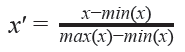

In [ ]:
cetak_rentang(data_norm)

Rentang fitur gender adalah 1.0
Rentang fitur age adalah 1.0
Rentang fitur smoking adalah 1.0
Rentang fitur yellow_fingers adalah 1.0
Rentang fitur anxiety adalah 1.0
Rentang fitur peer_pressure adalah 1.0
Rentang fitur chronic_disease adalah 1.0
Rentang fitur fatigue adalah 1.0
Rentang fitur allergy adalah 1.0
Rentang fitur wheezing adalah 1.0
Rentang fitur alcohol_consuming adalah 1.0
Rentang fitur coughing adalah 1.0
Rentang fitur shortness_of_breath adalah 1.0
Rentang fitur swallowing_difficulty adalah 1.0
Rentang fitur chest_pain adalah 1.0


Sesudah dilakukan normalisasi, rentang untuk semua fitur adalah 1. Hal itu berarti data sudah normal.

# **Exploratory Data Analysis**
Exploratory Data Analysis atau yang biasa disingkat dengan EDA merupakan proses yang untuk mengeksplorasi data dan mencari pola dan hubungan yang mungkin tidak diketahui sebelumnya. Metode EDA berfokus pada eksplorasi visual dan menggunakan statistik deskriptif untuk mengidentifikasi pola dan hubungan dalam data.

## **Features**
Semua fitur yang ada pada dataset divisualisasikan.

In [ ]:
numerical = ['age']
categorical = ['gender', 'smoking', 'yellow_fingers', 'anxiety', 'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing',
              'alcohol_consuming', 'coughing', 'shortness_of_breath', 'swallowing_difficulty', 'chest_pain', 'lung_cancer']

Kolom bertipe numerik dan kategorikal dipisah dalam variabel yang berbeda.

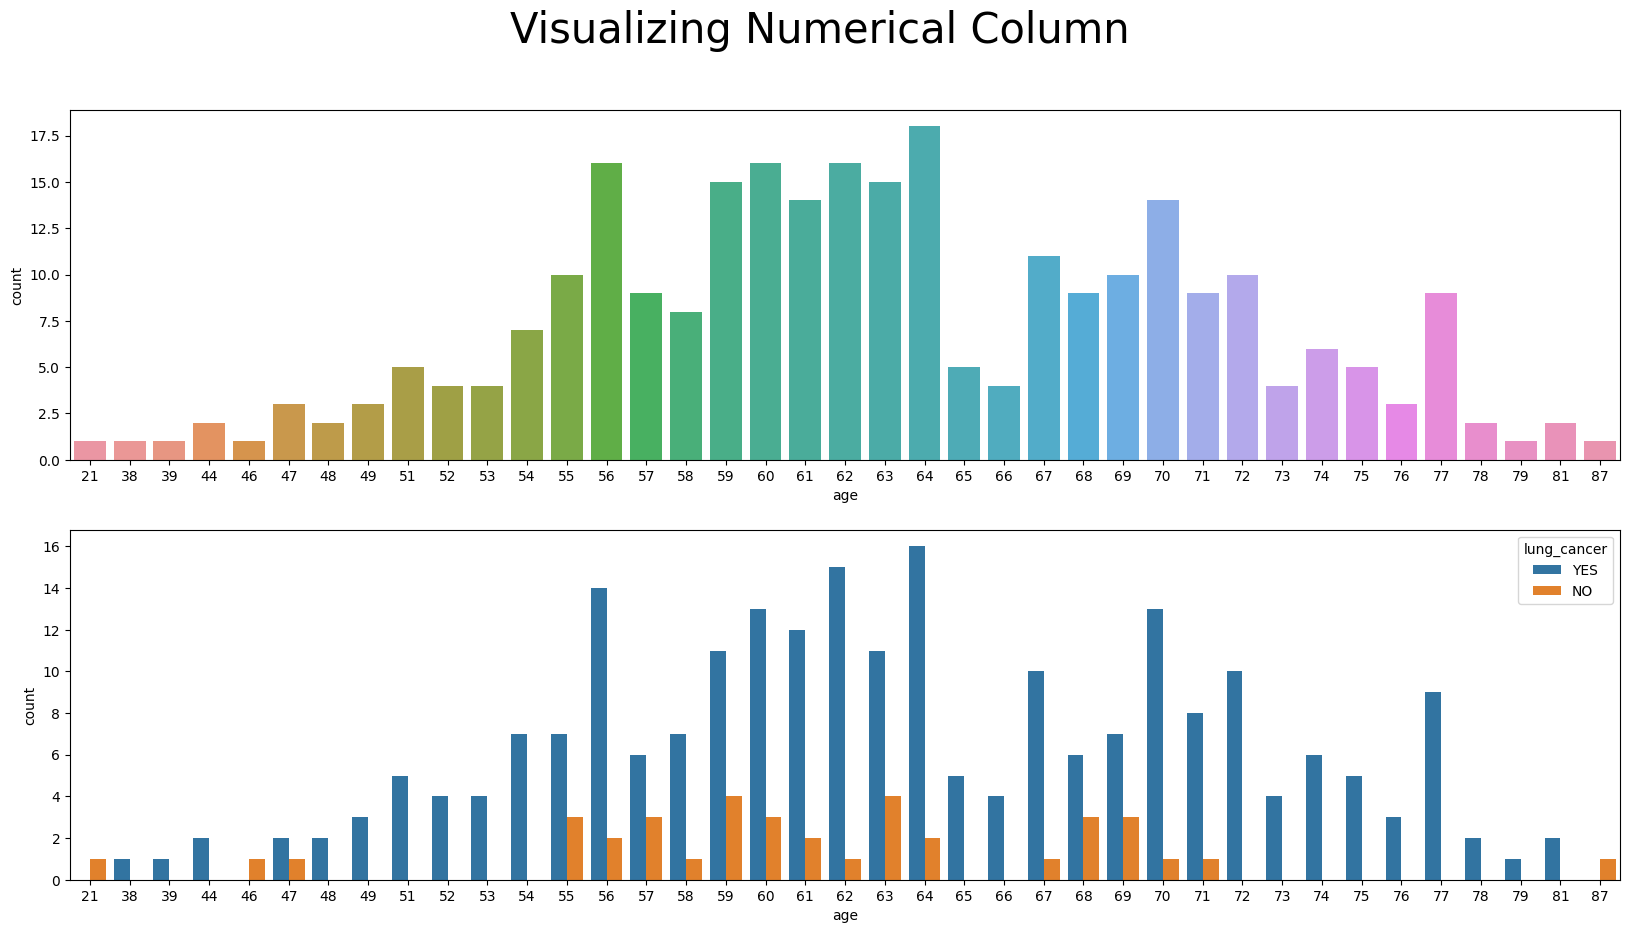

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
plt.suptitle("Visualizing Numerical Column", fontsize=30)
sns.countplot(data=data, x='age', ax=axs[0])
sns.countplot(data=data, x='age', ax=axs[1], hue='lung_cancer')
plt.show()

- Dataset berisi survei terhadap orang-orang yang berumur 21 - 87 tahun. Responden paling banyak berumur 64 tahun.
- Responden dengan umur 64 tahun adalah responden yang paling banyak menderita kanker paru-paru, yaitu 16 orang, disusul oleh responden berusia 62 tahun dan 56 tahun yang masing-masing jumlah penderitanya, yaitu 15 orang dan 14 orang.

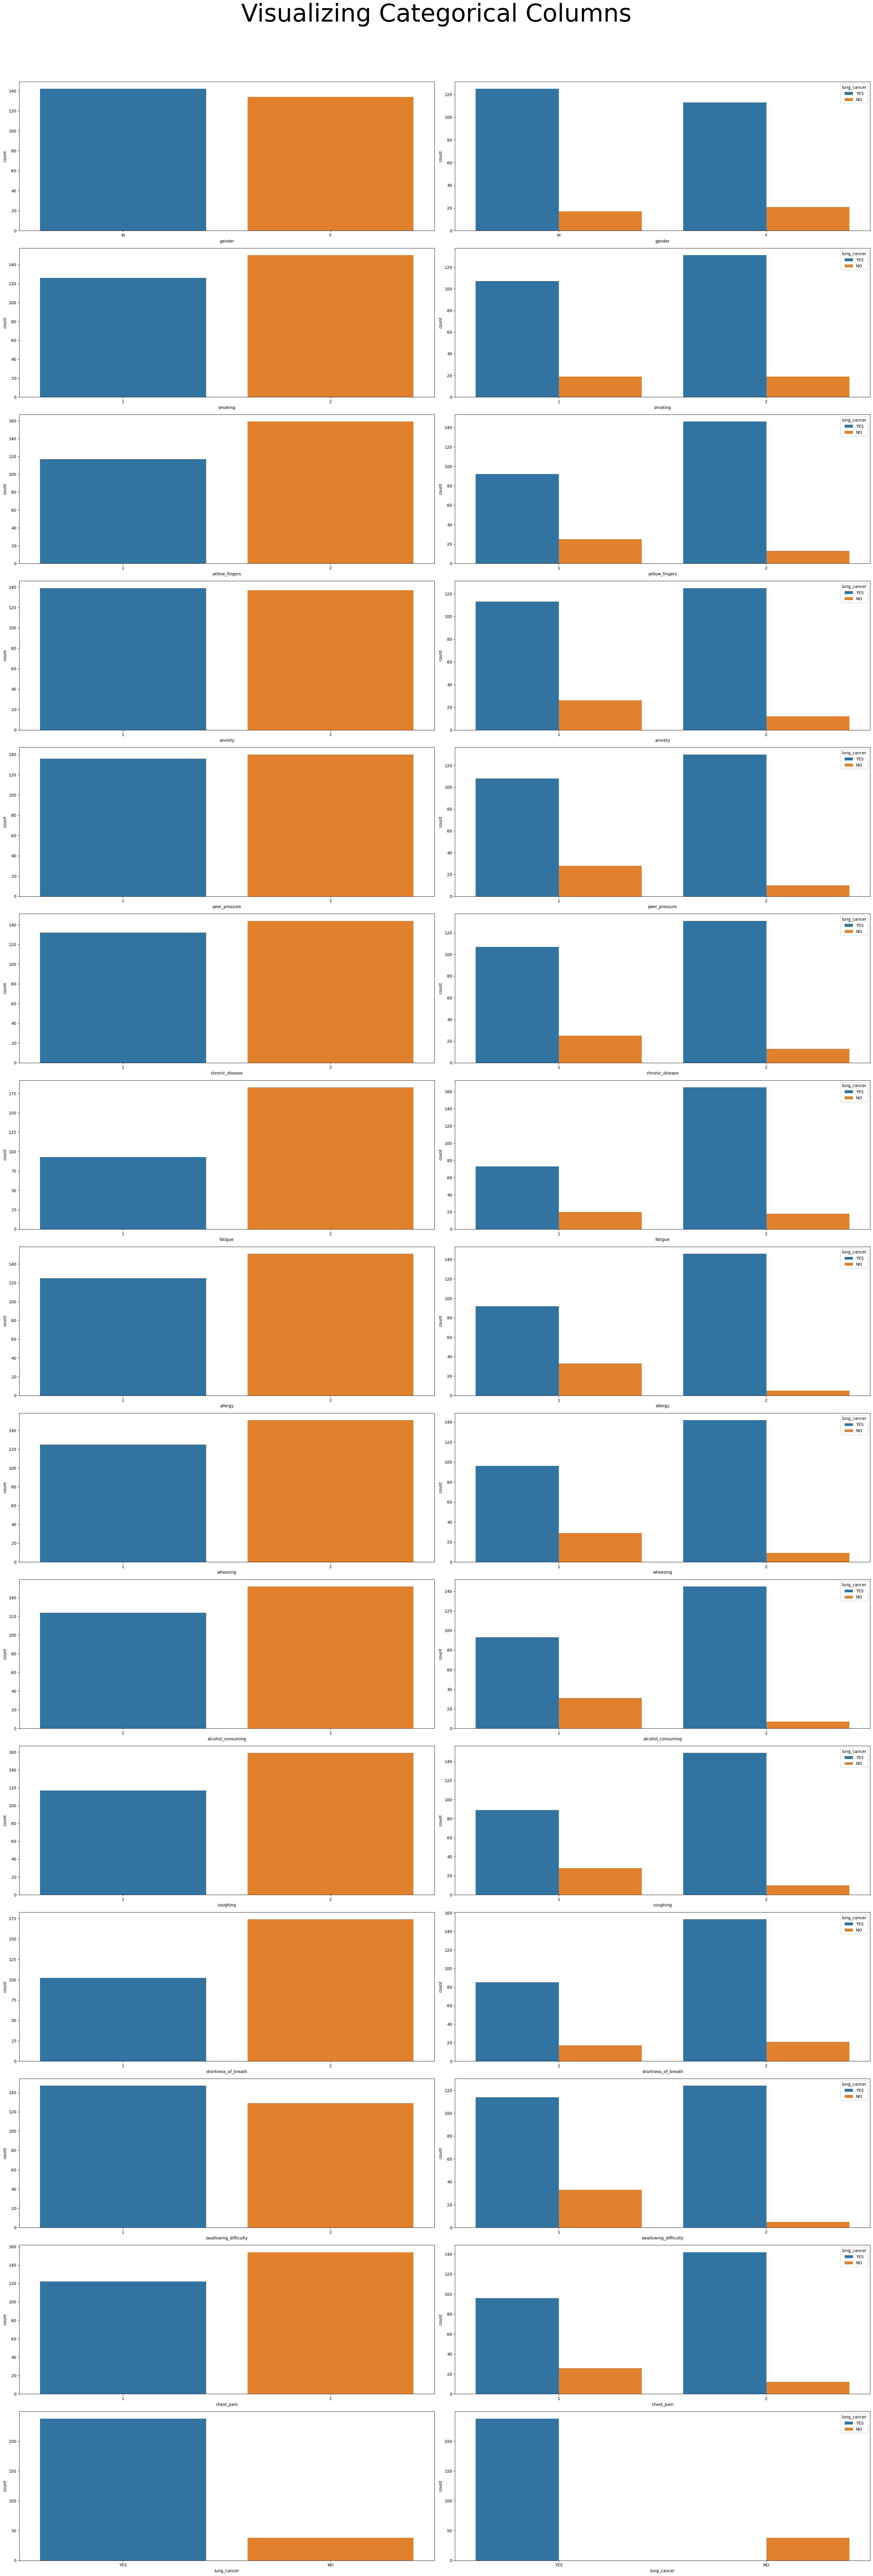

In [ ]:
fig,ax = plt.subplots(15, 2, figsize=(30, 90))
plt.suptitle("Visualizing Categorical Columns", fontsize=60)
for index, i in enumerate(categorical):
    sns.countplot(data=data, x=i, ax=ax[index, 0])
    sns.countplot(data=data, x=i, ax=ax[index, 1], hue='lung_cancer')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

- Responden paling banyak adalah pria daripada wanita. Responden yang paling banyak menderita kanker paru-paru adalah pria.
- Responden lebih banyak yang merokok daripada yang tidak. Responden yang paling banyak menderita kanker paru-paru adalah yang merokok.
- Responden lebih banyak yang memiliki jari kuning daripada yang tidak. Responden yang paling banyak menderita kanker paru-paru adalah yang memiliki jari kuning.
- Responden lebih banyak yang tidak memiliki gangguan kecemasan daripada yang memiliki. Responden yang paling banyak menderita kanker paru-paru adalah yang memiliki gangguan kecemasan.
- Responden lebih banyak yang mendapatkan tekanan daripada yang tidak. Responden yang paling banyak menderita kanker paru-paru adalah yang mmendapatkan tekanan.
- Responden lebih banyak yang menderita penyakit kronis daripada yang tidak. Responden yang paling banyak menderita kanker paru-paru adalah yang menderita penyakit kronis.
- Responden lebih banyak yang mengalami kelelahan daripada yang tidak. Responden yang paling banyak menderita kanker paru-paru adalah yang mengalami kelelahan.
- Responden lebih banyak yang memiliki alergi daripada yang tidak. Responden yang paling banyak menderita kanker paru-paru adalah yang memiliki alergi.
- Responden lebih banyak yang kesulitan bernapas daripada yang tidak. Responden yang paling banyak menderita kanker paru-paru adalah yang kesulitan bernapas.
- Responden lebih banyak yang mengonsumsi alkohol daripada yang tidak. Responden yang paling banyak menderita kanker paru-paru adalah yang memiliki mengonsumsi alkohol.
- Responden lebih banyak yang menderita batuk daripada yang tidak. Responden yang paling banyak menderita kanker paru-paru adalah yang menderita batuk.
- Responden lebih banyak yang memiliki napas pendek daripada yang tidak. Responden yang paling banyak menderita kanker paru-paru adalah yang memiliki napas pendek.
- Responden lebih banyak yang tidak kesulitan menelan daripada yang kesulitan. Responden yang paling banyak menderita kanker paru-paru adalah yang kesulitan menelan.
- Responden lebih banyak yang menderita sakit dada daripada yang tidak. Responden yang paling banyak menderita kanker paru-paru adalah yang menderita sakit dada.
- Responden paling banyak menderita kanker paru-paru.

## **Correlation**
Correlation atau korelasi adalah suatu ukuran untuk mengukur sejauh mana hubungan linier antara dua variabel. Korelasi dapat menunjukkan apakah suatu variabel memiliki hubungan positif atau negatif dengan variabel lainnya.

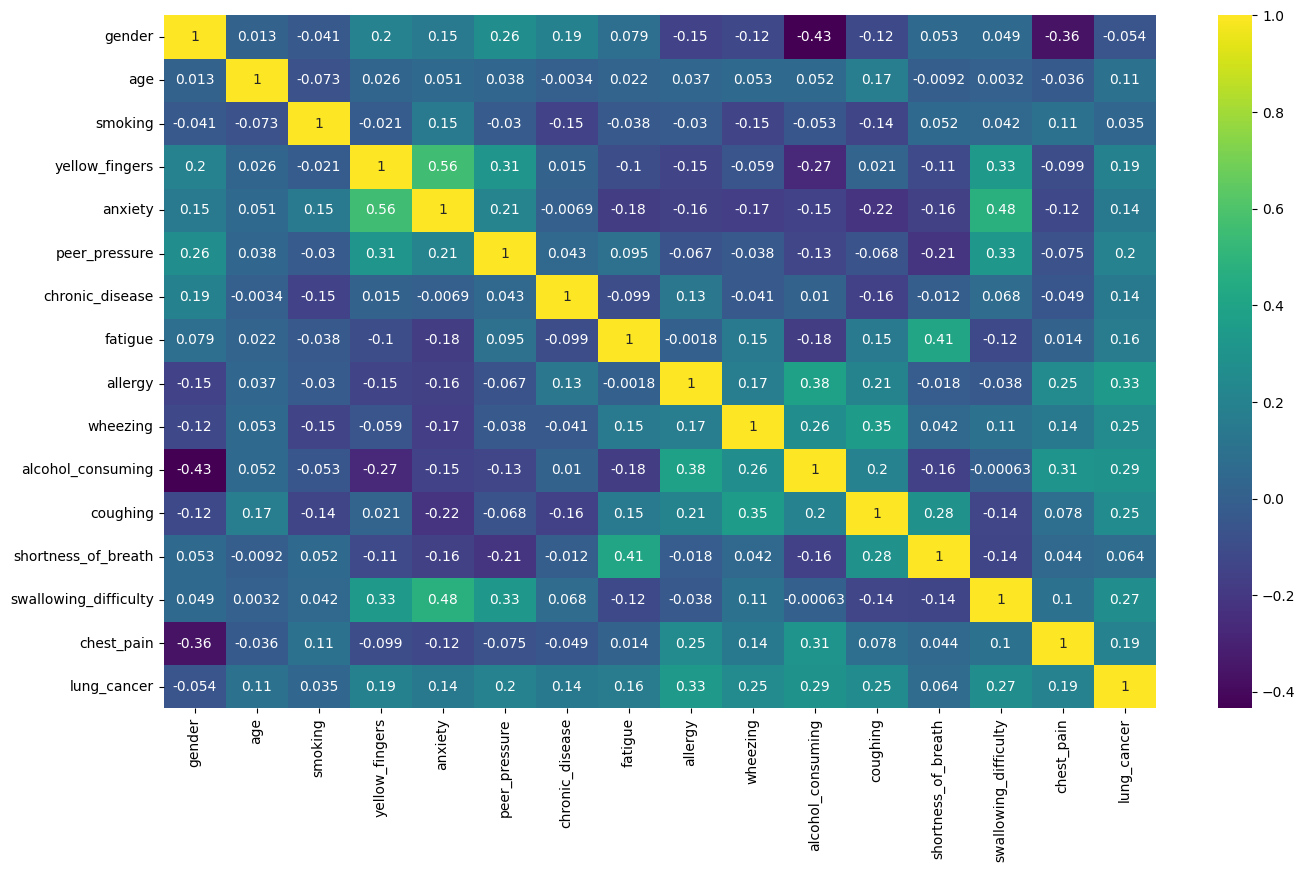

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(data_encoding.corr(), annot = True, cmap = 'viridis')
plt.show()

Nilai korelasi berkisar antara -1 hingga 1, dimana nilai -1 menunjukkan hubungan negatif yang sempurna, 0 menunjukkan tidak ada hubungan, dan 1 menunjukkan hubungan positif yang sempurna. Korelasi sering digunakan dalam analisis statistik untuk mengevaluasi hubungan antara dua variabel.

## **Distribution**
Distribusi data (data distribution) adalah cara bagaimana data terdistribusi atau tersebar dalam sebuah populasi atau sampel data. Distribusi data dapat dilihat melalui beberapa karakteristik, seperti bentuk kurva, pusat (mean, median, mode), ukuran penyebaran (range, variance, deviasi standar), dan kemencengan (skewness) dari data. Ada beberapa jenis distribusi data, termasuk distribusi normal (normal distribution).

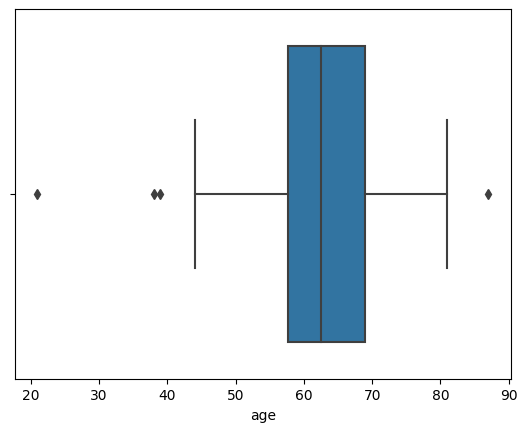

In [ ]:
for col in numerical:
  sns.boxplot(x=data[col])

Sebelum dilakukan normalisasi, terdapat beberapa data pencilan (outlier) pada fitur umur.

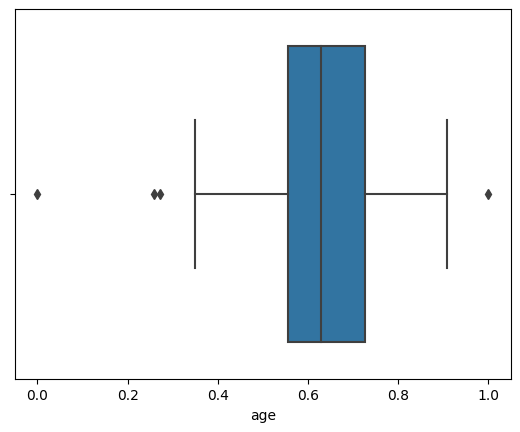

In [ ]:
for col in numerical:
  sns.boxplot(x=data_norm[col])

Setelah dilakukan normalisasi, hasil boxplot sama saja. Hal itu mungkin terjadi karena normalisasi min-max tidak mempengaruhi nilai kuartil dan nilai minimum dan maksimum data sehingga tidak mengubah bentuk distribusi data. Namun, normalisasi min-max dapat mempengaruhi skala data, sehingga dapat memudahkan untuk membandingkan distribusi data yang berbeda skala.

# **Modelling (Prediction)**
Proses modeling adalah suatu tahapan dalam data science atau machine learning yang melibatkan pembuatan model atau algoritma untuk mempelajari pola atau hubungan pada data, sehingga model tersebut dapat digunakan untuk memprediksi nilai atau kelas pada data baru. Prediksi pada machine learning adalah kemampuan model untuk melakukan estimasi atau memprediksi nilai yang belum diketahui atau belum diamati berdasarkan pola atau hubungan yang dipelajari dari data yang telah diamati sebelumnya.

## **Splitting Dataset**
Splitting dataset adalah proses membagi dataset menjadi subset yang lebih kecil, menjadi dua subset yaitu training set dan testing set. Training set digunakan untuk melatih model atau algoritma machine learning. Testing set, di sisi lain, digunakan untuk menguji performa model atau algoritma machine learning.

In [ ]:
train_size = int(len(data_norm) * 0.8)
data_shuffle = data_norm.sample(frac=1).reset_index(drop=True)
data_shuffle.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,0.0,0.530303,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-1
1,1.0,0.681818,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1
2,0.0,0.803030,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1
3,1.0,0.742424,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1
4,0.0,0.772727,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1


Ukuran data latih dideklarasikan sebagai 80% dari data yang ada. Sebelum dibagi, data diacak terlebih dahulu. Parameter frac=1 berarti bahwa seluruh baris dari data_norm akan diambil dan diacak dan index data akan di-reset.

In [ ]:
data_latih = data_shuffle[:train_size]
print("Jumlah data latih =", data_latih.shape[0])
data_latih.head()

Jumlah data latih = 220


,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,0.0,0.530303,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-1
1,1.0,0.681818,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1
2,0.0,0.803030,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1
3,1.0,0.742424,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1
4,0.0,0.772727,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1


Data latih yang digunakan adalah 80% dari data yang sudah diacak, yaitu sejumlah 220 baris.

In [ ]:
data_uji = data_shuffle[train_size:]
print("Jumlah data uji =", data_uji.shape[0])
data_uji.head()

Jumlah data uji = 56


,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
220,1.0,0.530303,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1
221,0.0,0.803030,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1
222,0.0,0.575758,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
223,1.0,0.848485,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1
224,0.0,0.393939,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1


Data uji yang digunakan adalah 20% dari data yang sudah diacak, yaitu sejumlah 56 baris.

In [ ]:
label_latih = data_latih.pop('lung_cancer')
label_latih.head()

0   -1
1    1
2    1
3   -1
4    1
Name: lung_cancer, dtype: int64

Label latih dikeluarkan dari data latih untuk dilakukan proses training.

In [ ]:
label_uji = data_uji.pop('lung_cancer')
label_uji.head()

220    1
221    1
222    1
223    1
224    1
Name: lung_cancer, dtype: int64

Label uji dikeluarkan dari data uji untuk dilakukan proses testing.

## **Training Process With SVM**
Algoritma SVM bekerja dengan cara mencari hyperplane (garis pembatas) terbaik yang memisahkan dua kelas data secara optimal. Hyperplane yang dipilih adalah yang memiliki jarak terbesar (margin) antara data dari kedua kelas. SVM juga dapat mengatasi masalah data yang tidak linearly separable melalui penggunaan kernel function yang dapat memetakan data ke dalam dimensi yang lebih tinggi.

In [ ]:
def hitung_cost_gradient(W, X, Y, regularization):
  jarak = 1 - (Y * np.dot(X, W))
  dw = np.zeros(len(W))
  if max(0, jarak) == 0:
    di = W
  else:
    di = W - (regularization * Y * X)
  dw += di
  return dw

Tujuan dari algoritma SVM adalah meminimalkan nilai cost function. Penghitungan
nilai minimal dapat dapat dilakukan dengan menghitung nilai gradien dari cost function terlebih dahulu. Fungsi di atas berguna untuk menghitung nilai gradien cost function seperti rumus yang ada di bawah ini.

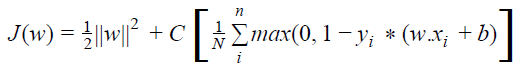

In [ ]:
def sgd(data_latih, label_latih, learning_rate=0.000001, max_epoch=1000, regularization=100000):
  data_latih = np.array(data_latih)
  label_latih = np.array(label_latih)
  bobot = np.zeros(data_latih.shape[1])
  for epoch in range(1, max_epoch):
    indices = np.random.permutation(len(data_latih))
    data_latih = data_latih[indices]
    label_latih = label_latih[indices]
    for index, x in enumerate(data_latih):
      delta = hitung_cost_gradient(bobot, x, label_latih[index], regularization)
      bobot = bobot - (learning_rate * delta)
  return bobot

Terdapat beberapa cara untuk meminimalkan nilai cost function, salah satunya
menggunakan Stochastic Gradient Descent (SGD) untuk melakukan minimasi. Minimasi
cost function merupakan inti dari algoritma SVM. Pada algoritma SGD, dilakukan perulangan sebanyak max_epoch dan dilakukan perhitungan bobot, yang merupakan parameter hyperplane. Pada setiap perulangan dilakukan pengacakan data, agar tidak terjadi pola perhitungan bobot yang sama. Nilai bobot diperoleh dari bobot dikurangi gradien dikali dengan learning rate. Nilai learning rate merupakan sebuah parameter yang mengatur seberapa besar perubahan bobot dilakukan.Fungsi di atas merupakan implementasi algoritma SGD. Berikut adalah rumus untuk algoritma SGD.

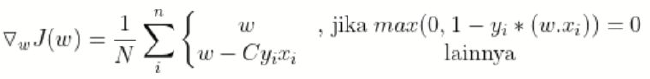

In [ ]:
W = sgd(data_latih, label_latih)
W

array([-0.1046882 , -5.1535895 ,  0.56666294,  0.70915008, -0.10332448,
        0.70865558,  1.65042648,  1.46147002,  1.38227198,  0.8097434 ,
        0.54011878,  1.29728056, -0.86627974,  1.22627106,  0.4073367 ])

Fungsi SGD dipanggil dengan parameter input berupa data latih dan label latih.

# **Result**
Result adalah hasil dari prediksi untuk data uji yang nantinya akan dilakukan evaluasi.

In [ ]:
def testing(W, data_uji):
  prediksi = np.array([])
  for i in range(data_uji.shape[0]):
    y_prediksi = np.sign(np.dot(W, data_uji.to_numpy()[i]))
    prediksi = np.append(prediksi, y_prediksi)
  return prediksi

Hasil prediksi didapatkan dengan menghitung nilai dot product antara bobot hasil
training dengan data uji. Kelas data ditentukan berdasarkan tanda (positif atau negatif) dari hasil dot product tersebut. Fungsi berikut mengimplementasikan proses testing.

In [ ]:
y_prediksi = testing(W, data_uji)
result = pd.DataFrame({'lung_cancer' : y_prediksi})
result.head(10)

,lung_cancer
0,1.0
1,1.0
2,-1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


Hasil prediksi didapatkan untuk kemudian dilakukan evaluasi.

# **Evaluation**
Evaluation dalam data science adalah proses mengevaluasi hasil dari seluruh tahap yang telah dilakukan sebelumnya. Proses ini mencakup mengukur akurasi dari model yang telah dibuat dan mengevaluasi kinerja model. Proses ini juga bertujuan untuk mengidentifikasi kemungkinan kegagalan atau masalah yang mungkin terjadi dan mengidentifikasi cara yang lebih baik untuk meningkatkan model.

In [ ]:
print("Jumlah label benar =", sum(y_prediksi == label_uji))
print("Presentase akurasi = " + str(round(sum(y_prediksi == label_uji)/len(label_uji)*100)) + "%")

Jumlah label benar = 53
Presentase akurasi = 95%


Evaluasi dilakukan dengan membandingkan hasil prediksi dan label uji. Setelah itu, presentase dari jumlah yang benar dihitung. Hasil dari evaluasi tersebut sama dengan hasil evaluasi dengan menggunakan confusion matrix dan classification report, yaitu pada bagian f1-score untuk weighted avg. Jumlah label benar yang didapatkan adalah 53 dengan presentase akurasi 83%.

In [ ]:
def calculate_precision(true_positive, false_positive):
    return true_positive / (true_positive + false_positive)

def calculate_recall(true_positive, false_negative):
    return true_positive / (true_positive + false_negative)

def calculate_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

y_true = label_uji
y_pred = y_prediksi

true_positive_1 = sum([1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 1])
false_positive_1 = sum([1 for yt, yp in zip(y_true, y_pred) if yt == -1 and yp == 1])
false_negative_1 = sum([1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == -1])

true_positive_minus_1 = sum([1 for yt, yp in zip(y_true, y_pred) if yt == -1 and yp == -1])
false_positive_minus_1 = sum([1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == -1])
false_negative_minus_1 = sum([1 for yt, yp in zip(y_true, y_pred) if yt == -1 and yp == 1])

precision_1 = calculate_precision(true_positive_1, false_positive_1)
recall_1 = calculate_recall(true_positive_1, false_negative_1)
f1_score_1 = calculate_f1_score(precision_1, recall_1)

precision_minus_1 = calculate_precision(true_positive_minus_1, false_positive_minus_1)
recall_minus_1 = calculate_recall(true_positive_minus_1, false_negative_minus_1)
f1_score_minus_1 = calculate_f1_score(precision_minus_1, recall_minus_1)

support = [sum(1 for yt in y_true if yt == label) for label in set(y_true)]

weighted_precision = ((precision_1 * support[0] / (support[0] + support[1]))+ (precision_minus_1 * support[1]) / (support[0] + support[1]))
weighted_recall = ((recall_1 * support[0] / (support[0] + support[1]))+ (recall_minus_1 * support[1]) / (support[0] + support[1]))
weighted_f1_score = ((f1_score_1 * support[0] / (support[0] + support[1]))+ (f1_score_minus_1 * support[1]) / (support[0] + support[1]))

print("Label 1")
print("Precision =", precision_1)
print("Recall =", recall_1)
print("F1 Score =", f1_score_1)
print("Support =", support[0])
print("\n")

print("Label -1")
print("Precision =", precision_minus_1)
print("Recall =", recall_minus_1)
print("F1 Score =", f1_score_minus_1)
print("Support =", support[1])
print("\n")

print("Weighted Avg")
print("Precision =", weighted_precision)
print("Recall =", weighted_recall)
print("F1 Score =", weighted_f1_score)
print("Support =", support[0] + support[1])

Label 1
Precision = 0.9803921568627451
Recall = 0.9615384615384616
F1 Score = 0.970873786407767
Support = 52


Label -1
Precision = 0.6
Recall = 0.75
F1 Score = 0.6666666666666665
Support = 4


Weighted Avg
Precision = 0.9532212885154061
Recall = 0.9464285714285715
F1 Score = 0.9491447064262597
Support = 56


Evaluasi klasifikasi juga dilakukan dengan menggunakan precision, recall, dan f1 score.

# **Conclusion and Recommendation**
Dataset ini tidak memiliki missing values, tetapi memiliki baris yang terduplikat. Prediksi sudah dilakukan pada dataset dengan menggunakan algoritma SVM dengan membuatnya dari scratch. Evaluasi pengujian dilakukan dengan membandingkan hasil prediksi dan label uji. Hasil evaluasi yang didapatkan adalah 53 jumlah label benar dengan presentase akurasi 95%. Akan tetapi, hasil prediksi dan evaluasi berubah-ubah karena proses splitting dataset yang dilakukan. Berdasarkan hasil evaluasi, presentase yang dihasilkan sudah lumayan tinggi. Namun, akurasi tersebut dapat ditingkatkan dengan pembersihan data yang lebih baik dan penggunaan algoritma lainnya.

Penggunaan algoritma lain mungkin dapat meningkatkan nilai akurasi, misalnya algoritma KNN, Decision Tree, dan lain sebagainya. Selain itu, penggunaan algoritma machine learning, seperti scikit-learn dapat memudahkan proses modelling. Hal itu dapat terjadi karena waktu yang digunakan akan lebih sedikit serta minim error.